## Post Process ngspice's Simulation Results with Python

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load the simulation's data

In [2]:
df = pd.read_csv('./inv_tb_stat_enh.txt', sep='\\s+')

par_names = df.columns.to_list()
print(par_names)

['v-sweep', 'v(in)', 'v(out)', 'VSW', 'VIL', 'VIH', 'VOH', 'VOL']


### Extract and massage the data

In [3]:
df = df.apply(pd.to_numeric)

vin  = df[["v(in)"]]
vout = df[["v(out)"]]

VSW  = df[["VSW"]]
VSW = VSW.to_numpy()
VSW = VSW[0,0]

VOH  = df[["VOH"]]
VOH = VOH.to_numpy()
VOH = VOH[0,0]

VIL  = df[["VIL"]]
VIL = VIL.to_numpy()
VIL = VIL[0,0]

VOL  = df[["VOL"]]
VOL = VOL.to_numpy()
VOL = VOL[0,0]

VIH  = df[["VIH"]]
VIH = VIH.to_numpy()
VIH = VIH[0,0]

print(VSW)
print(VOH)
print(VOL)
print(VIL)
print(VIH)

1.525452
3.001193
0.2865048
1.204496
1.775522


### Plot

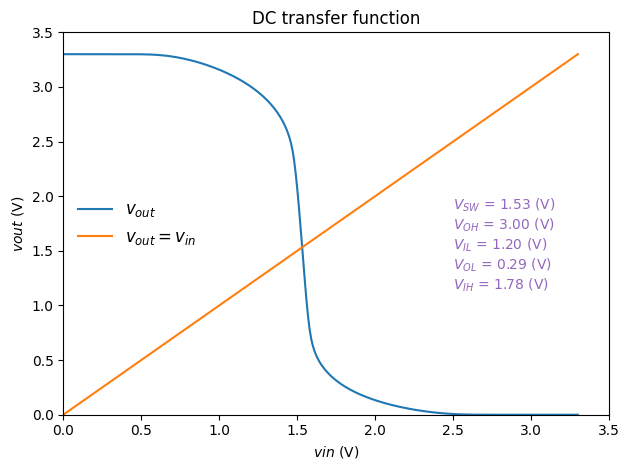

In [4]:
fig1 = plt.figure()
plt.plot(vin,vout,label="$v_{out}$")
plt.plot(vin,vin,label="$v_{out}=v_{in}$")
plt.xlabel("$vin$ (V)")
plt.ylabel("$vout$ (V)")
plt.title("DC transfer function")
plt.ylim(0,3.5)
plt.xlim(0,3.5)
plt.legend(loc='center left',frameon=False,fontsize=12)
str1 = f" = {VSW:.2f} (V)"
str2 = f" = {VOH:.2f} (V)"
str3 = f" = {VIL:.2f} (V)"
str4 = f" = {VOL:.2f} (V)"
str5 = f" = {VIH:.2f} (V)"
plt.annotate("$V_{SW}$" + str1 + '\n' + "$V_{OH}$" + str2 + '\n' +
"$V_{IL}$" + str3 + '\n' + "$V_{OL}$" + str4 + '\n' +
"$V_{IH}$" + str5,
xy=(2.5,2.0), ha='left',va='top',color='tab:purple')
fig1.tight_layout()
plt.savefig("../plots/Plot_inv_tb_stat_enh.png")
plt.show()